In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
site = ["A", "B", "C", "D", "E", "F", "G", "H"]
data_all = []

# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data_clean'

for s in site: 
    data_name = s + "_data_clean.csv"
    d = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name), index_col = 0)
    data_all.append(d)

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
data_all

[                         ts  Month  Day  Hour instanceID  Wind_speed  \
 0       2020-01-01 00:00:00      1    1     0    A_WTG01    3.625675   
 1       2020-01-01 00:00:00      1    1     0    A_WTG02    3.641454   
 3       2020-01-01 00:00:00      1    1     0    A_WTG04    5.191913   
 5       2020-01-01 00:00:00      1    1     0    A_WTG06    2.640701   
 6       2020-01-01 00:10:00      1    1     0    A_WTG01    4.070176   
 ...                     ...    ...  ...   ...        ...         ...   
 316225  2021-01-01 00:00:00      1    1     0    A_WTG02    8.235878   
 316226  2021-01-01 00:00:00      1    1     0    A_WTG03    8.604806   
 316227  2021-01-01 00:00:00      1    1     0    A_WTG04    8.210593   
 316228  2021-01-01 00:00:00      1    1     0    A_WTG05    7.996056   
 316229  2021-01-01 00:00:00      1    1     0    A_WTG06    7.451632   
 
         Wind_speed_sd         TI  Temperature       Power Site  
 0            0.256472   7.073759     1.643807    61.433

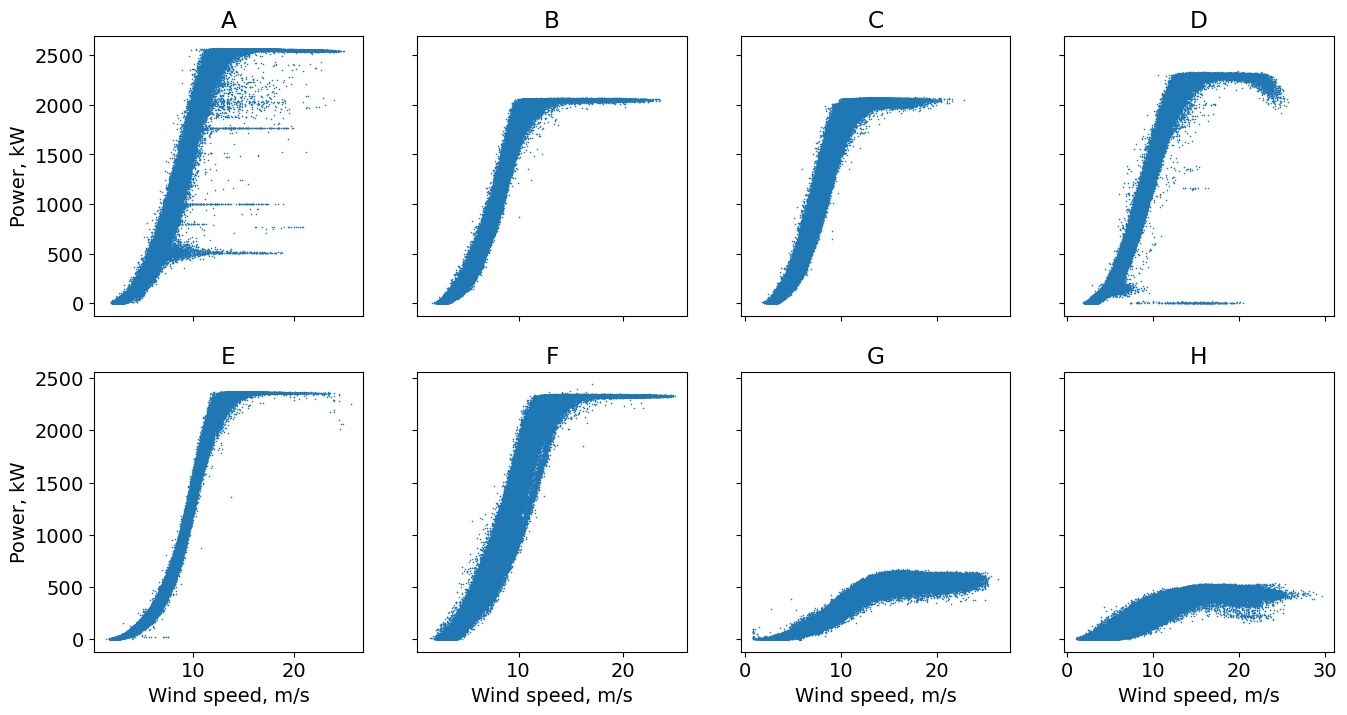

Wall time: 4.12 s


In [3]:
%%time
# Plot power curve for each turbine
plt.rc('font', size=14) 

fig, ax = plt.subplots(2,4, figsize=(16,8), sharex='col', sharey='row');

i = 0
for r in range (2):
        for c in range (4):
            data_turbine = data_all[i]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(site[i])
            ax[r][c].set_xlabel("Wind speed, m/s") 
            ax[r][c].set_ylabel("Power, kW") 
            i += 1
plt.show()

In [4]:
# assign site name in the dataframe
i = 0

for s in site: 
    data_all[i] = data_all[i].assign(Site = s)
    i += 1

In [5]:
# combine data frames
data_all_combined = pd.DataFrame()
for i in range (len(site)):
    if data_all_combined.empty: 
        data_all_combined = data_all[i]
    else:
        data_all_combined = pd.concat([data_all_combined, data_all[i]])

In [15]:
data_all_combined

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,Site
0,2020-01-01 00:00:00,1,1,0,A_WTG01,3.625675,0.256472,7.073759,1.643807,61.43359,A
1,2020-01-01 00:00:00,1,1,0,A_WTG02,3.641454,0.538374,14.784600,1.917134,83.51791,A
3,2020-01-01 00:00:00,1,1,0,A_WTG04,5.191913,0.536756,10.338318,1.985323,170.29570,A
5,2020-01-01 00:00:00,1,1,0,A_WTG06,2.640701,0.540999,20.486965,2.527086,15.50309,A
6,2020-01-01 00:10:00,1,1,0,A_WTG01,4.070176,0.300118,7.373585,1.871247,125.96530,A
...,...,...,...,...,...,...,...,...,...,...,...
1159448,2020-12-31 23:40:00,12,31,23,H_WTG05,3.400000,0.450000,13.235293,6.000000,3.00000,H
1159458,2020-12-31 23:40:00,12,31,23,H_WTG15,3.700000,0.890000,24.054053,3.000000,31.00000,H
1159468,2020-12-31 23:50:00,12,31,23,H_WTG03,4.100000,0.770000,18.780488,7.000000,1.00000,H
1159480,2020-12-31 23:50:00,12,31,23,H_WTG15,2.900000,0.710000,24.482757,3.000000,16.00000,H


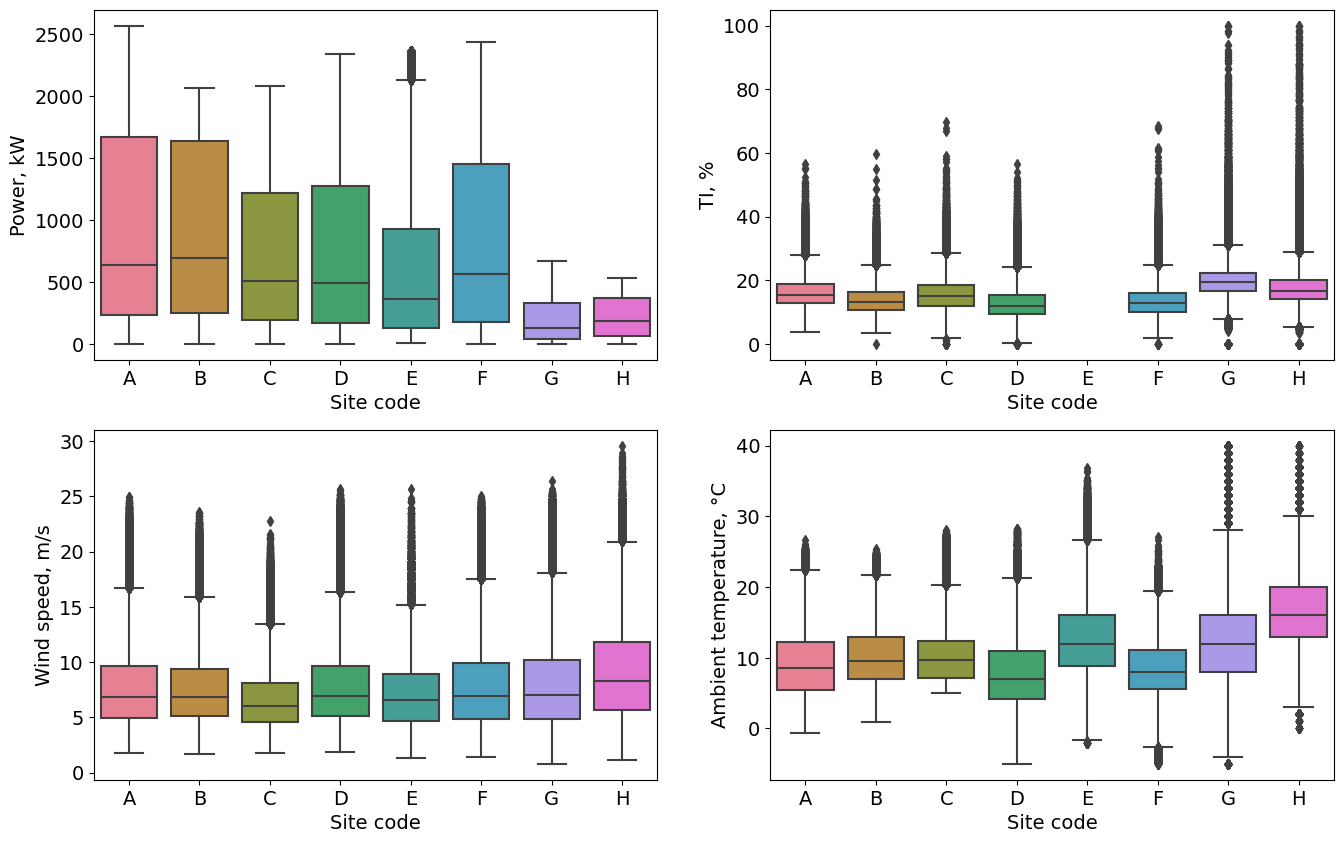

Wall time: 9.27 s


In [9]:
%%time 

# Make boxplot
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

features = [ 'Power','Wind_speed', 'TI','Temperature']
features_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

i = 0
for r in range (2):
    for c in range (2):
        sns.boxplot( data = data_all_combined, y = features[i], x = 'Site', orient = 'v', ax = ax[c][r], palette = "husl")
        ax[c][r].set(ylabel = features_name[i], xlabel = 'Site code')
        i += 1

plt.show()

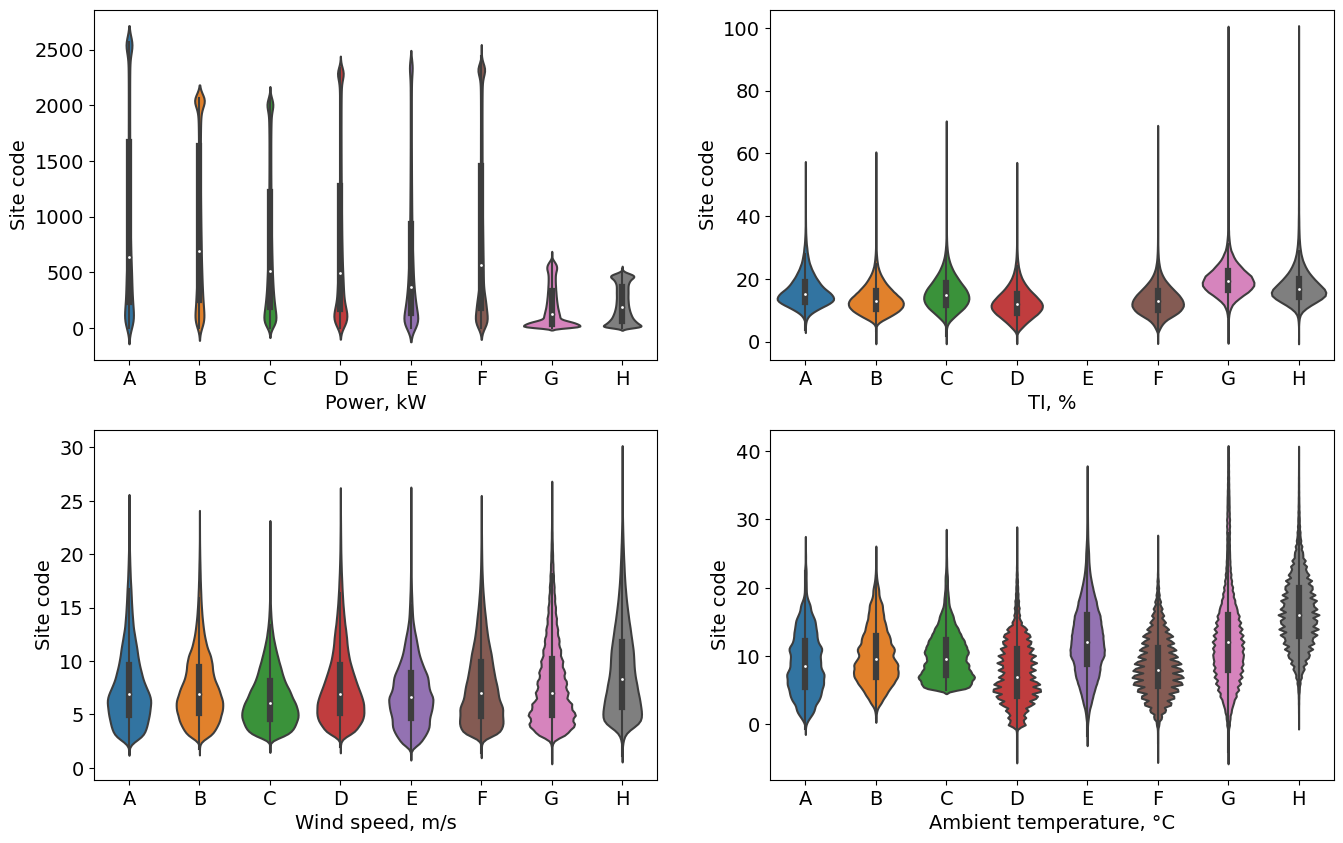

Wall time: 1min 14s


In [13]:
%%time 

# Make violin plot
plt.rc('font', size=14) 
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

features = [ 'Power','Wind_speed', 'TI','Temperature']
features_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

i = 0
for r in range (2):
    for c in range (2):
        sns.violinplot( data = data_all_combined, y = features[i], x = 'Site', orient = 'v', ax = ax[c][r])
        ax[c][r].set(xlabel = features_name[i], ylabel = 'Site code')
        i += 1

plt.show()